# BoundingBox Annotations on Images

In [1]:
from aperturedb import Connector
from aperturedb import NotebookHelpers as nh

# ApertureDB Server Info for establishing connection
db_host  = "aperturedb.local"  # assuming local installation as provided
user     = "admin"             # requires authentication
password = "admin"             # use the password provided for the instance

db = Connector.Connector(db_host, user=user, password=password)

## Introduce annotation on any image and then fetch just the pixel area within those coordinates
ApertureDB query language supports various [regions of interest](https://docs.aperturedata.io/category/image-and-related-commands) like BoundingBox, Polygon, to be associated with any image or frame.

In [2]:
query = [{
    "FindImage": {
        "_ref": 1,                        
        "constraints": {
            "id": ["==", 567989]
        },
        "blobs": False             # We don't need to fetch the actual pixels in this case
    }
}, {
    "AddBoundingBox": {
        "image_ref": 1,
        "rectangle": {
            "x": 40,               # pixels offset from the left edge
            "y": 50,               # pixels offset from the top edge
            "width": 450,          # box width in pixels
            "height": 400          # box height in pixels
        },
        "label": "Animal",
        "properties": {
            "name": "horse",
            "annotation_source": "manual"
        },
        "if_not_found": {         # Only add the bounding box if it doesn't already exist
            # note: These checks will operate faster if properties 'name' and 'annotation_source' are indexed
            "name": ["==", "horse"], 
            "annotation_source": ["==", "manual"]
        }
    }
}]

response, blobs = db.query(query)

db.print_last_response()

[
    {
        "FindImage": {
            "returned": 0,
            "status": 0
        }
    },
    {
        "AddBoundingBox": {
            "status": 0
        }
    }
]


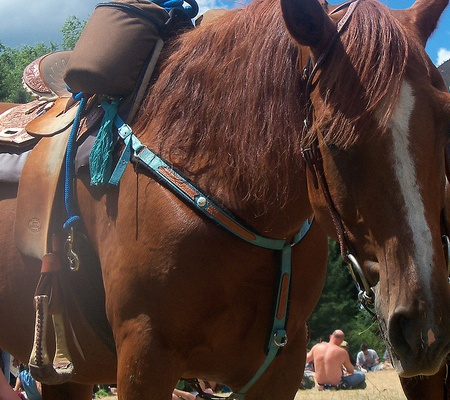

In [3]:
query = [ {
    "FindImage": {
        "_ref": 1,
        "constraints": {
            "id": ["==", 567989]
        },
        "blobs": False             # Don't retrieve pixel data from the image...
    }
}, {
    "FindBoundingBox": {
        "is_connected_to": {
            "ref": 1
        },
        "with_label": "Animal",
        "blobs": True              # Instead, retrieve pixel data from the bounding box
    }
}]

res, blobs = db.query(query)

# This will display the image cropped to the bounding box
nh.display(blobs)

## Find an image by its label

[
    {
        "FindBoundingBox": {
            "entities": [
                {
                    "_coordinates": {
                        "height": 400,
                        "width": 450,
                        "x": 40,
                        "y": 50
                    },
                    "_label": "Animal"
                }
            ],
            "returned": 1,
            "status": 0
        }
    },
    {
        "FindImage": {
            "blobs_start": 0,
            "returned": 1,
            "status": 0
        }
    }
]


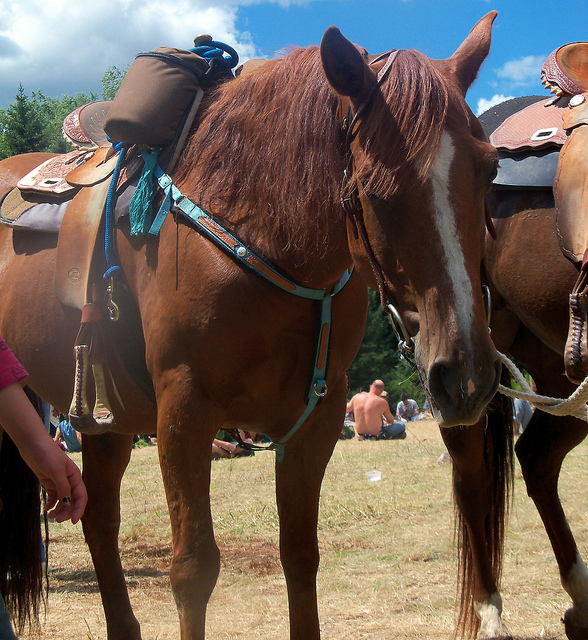

In [4]:
query = [ {
    "FindBoundingBox": {
        "_ref": 1,
        "with_label": "Animal",
        "coordinates": True,
        "labels": True,
        "blobs": False
    }}, {
    "FindImage": {
        "is_connected_to": {
            "ref": 1
        },
        "blobs": True
    }
} ]

res, blobs = db.query(query)

db.print_last_response()
nh.display(blobs)

## Delete the bounding box. 

In [5]:
query = [ {
    "DeleteBoundingBox": {
        "constraints": {
            "annotation_source": ["==", "manual"]
        }
    }
}]

res, blobs = db.query(query)

db.print_last_response()

[
    {
        "DeleteBoundingBox": {
            "count": 1,
            "status": 0
        }
    }
]
